# Load and install modules


In [1]:
!pip install -q transformers
!pip install -q tensorflow
!pip install -U sentence-transformers

# need to upgrade numpy for hdbscan
# !pip install numpy==1.16.0

# install this first before hdbscan
!pip install Cython

!pip install hdbscan

     |████████████████████████████████| 3.1 MB 14.4 MB/s 
     |████████████████████████████████| 895 kB 63.3 MB/s 
     |████████████████████████████████| 61 kB 396 kB/s 
     |████████████████████████████████| 596 kB 76.2 MB/s 
     |████████████████████████████████| 3.3 MB 85.5 MB/s 
     |████████████████████████████████| 78 kB 6.2 MB/s 
     |████████████████████████████████| 1.2 MB 87.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=0883f12e176f494d5c5f00a55ea7910fcb990f44a4567488e52730376c0e101c
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
     |████████████████████████████████| 6.4 MB 13.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size

In [2]:

from __future__ import absolute_import, division, print_function, unicode_literals
import functools
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans


import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.manifold import TSNE

# from sklearn.decomposition import PCA
# from sklearn import metrics
# from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
# from transformers import pipeline

import glob
import pandas as pd
import numpy as np

import re

import os
import hdbscan

from numpy import asarray
from numpy import save
from numpy import load
from google.colab import files
from google.colab import drive
drive.mount('/content/drive' ,force_remount=True)
os.chdir("drive/MyDrive/vaccine/data/")
os.listdir()


from keras.models import Model
from keras.layers import Dense, Activation

from tensorflow.keras.optimizers import Adam, SGD
from keras.models import Sequential
from keras import backend as K

import matplotlib.pyplot as plt


Mounted at /content/drive


In [4]:
!pwd

/content


##Sentence embedding trainer from  https://github.com/UKPLab/sentence-transformers/blob/master/examples/unsupervised_learning/MLM/train_mlm.py

--2021-11-26 19:52:16--  https://raw.githubusercontent.com/UKPLab/sentence-transformers/master/examples/unsupervised_learning/MLM/train_mlm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4384 (4.3K) [text/plain]
Saving to: ‘train_mlm.py’

train_mlm.py        100%[===================>]   4.28K  --.-KB/s    in 0s      

2021-11-26 19:52:16 (10.1 MB/s) - ‘train_mlm.py’ saved [4384/4384]



# Next Section

In [3]:
os.chdir("drive/MyDrive/vaccine/data/")

# data = json.load(open("combined.csv", "r"))

def get_hashtag_pct(df):
  return df[df["hashtags"] != ''].shape[0]/df.shape[0] 
# df['hashtags'].unique().shape

In [13]:
!pwd


/content/drive/My Drive/vaccine/data


In [4]:
combined_df = pd.DataFrame(columns= ['created_at', 'id', 'text', 'hashtags', 'word_count'])
for file in glob.glob('second*.csv*'):
  df = pd.read_csv(file,na_filter=False)
  print(file,df.shape)
  # combined_df = pd.concat([combined_df,df], ignore_index=True)
df.shape

second_batch_combined.csv (1480544, 5)


(1480544, 5)

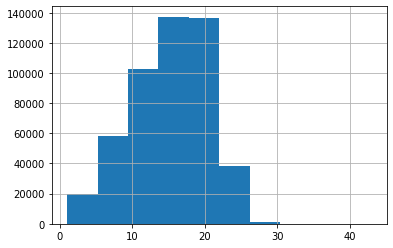

In [30]:
test_df = df.loc[df['text'].str.contains("vacc|vax", case = False )]
test_df['word_count'].idxmax()
test_df['word_count'].hist()

test_df['text'].to_csv('test.txt', sep=' ', index=False, header=False)

In [18]:
test_df.loc[test_df['word_count'] < 3]

,created_at,id,text,hashtags,word_count
1299,2017-03-25 09:01:34+00:00,845561285806743552,Vaccines Ingredients,,2
1366,2017-03-21 11:00:54+00:00,844141763195416577,vaccine DTBYSampal,DTBYSampal,2
1846,2017-03-21 09:42:36+00:00,844122059147956224,😂😂😂😂May vaccination??,,2
2942,2017-03-21 20:53:15+00:00,844290831997702144,Please Vaccinate!,,2
3262,2017-03-22 10:00:37+00:00,844488980859039744,"バクサネイターの綴りは""Vaccinator""で、「種痘医」、「ワクチン接種器」と言った意味...",,2
...,...,...,...,...,...
1479609,2020-12-17 11:13:56+00:00,1339529256267898880,Vaccine Joe.,,2
1479845,2020-12-18 06:42:36+00:00,1339823361170423808,DontTakeTheCovidVaccine,DontTakeTheCovidVaccine,1
1480019,2020-12-16 21:33:21+00:00,1339322747823022083,vaccinedatapoint,vaccinedatapoint,1
1480187,2020-12-15 00:37:58+00:00,1338644435450597379,COVID-19 vaccine,,2


In [ ]:
!python train_mlm.py sadakmed/distiluse-base-multilingual-cased-v2 train.txt

# New Section

In [15]:

df['word_count'][df['word_count'].idxmax()]
df['text'][df['word_count'].idxmax()]

'He seem tested positive . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . HIV'

In [17]:
df['word_count'][df['word_count'].idxmax()]
df['text'][df['word_count'].idxmax()]

'He seem tested positive . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . HIV'

In [ ]:
# glued_data = pd.DataFrame()
# for file in glob.glob('/content/drive/MyDrive/vaccine/shuffled2/trimmed json files/*.csv'):
#   if 'trimmed_201220_201226.csv' not in file:
#       df = pd.read_csv(file, na_filter= False)
#       glued_data = pd.concat([glued_data,df],axis=0, ignore_index= True)


# glued_data.shape



(1732535, 5)

In [16]:
get_hashtag_pct(df)

0.1045660727605476

# create embeddings from  pre trained sentence model

In [27]:
test_trimmed_text = test_df['text'].copy()

# trimmed_text = df['text'].copy()
# trimmed_hashtags = trimmed_df['hashtags'].copy
# AutoModel.from_pretrained('sadakmed_distiluse-base-multilingual-cased-v2-2021-11-27_16-23-03')
embedder = SentenceTransformer('output/sadakmed_distiluse-base-multilingual-cased-v2-2021-11-28_20-06-32' )
embedder.max_seq_length = 43

Some weights of the model checkpoint at output/sadakmed_distiluse-base-multilingual-cased-v2-2021-11-28_20-06-32 were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [22]:
!pwd

/content/drive/My Drive/vaccine/data


In [28]:

test_text_embeddings = embedder.encode(list(test_trimmed_text))


In [29]:
# Run this the first time
# save('train_text_embeddings.npy', text_embeddings)
save('test_text_embeddings.npy',test_text_embeddings)
test_text_embeddings[0]

array([-3.39949764e-02, -3.20426375e-03, -1.99703854e-02, -1.30944354e-02,
        7.42165046e-03, -1.98292043e-02,  1.57160182e-02, -1.13876536e-02,
        4.25913930e-02,  1.82983764e-02, -1.14823515e-02, -6.30278438e-02,
        5.52163459e-02,  2.05663592e-03,  6.96518496e-02,  2.31663659e-02,
        3.82234864e-02,  1.55554302e-02,  4.73122895e-02, -2.79101133e-02,
       -2.75094006e-02,  2.33827848e-02, -1.00902123e-02,  1.18670166e-02,
       -1.15923500e-02,  1.05330041e-02,  3.88877876e-02,  2.65511945e-02,
       -3.20104212e-02, -7.25539848e-02,  2.04806849e-02, -2.91180611e-02,
        2.66999584e-02,  1.53617067e-02, -7.03938976e-02, -1.33640543e-02,
        2.33623013e-02,  7.60234147e-03,  2.00947840e-02, -1.10492386e-01,
       -3.92414071e-02,  5.36117405e-02,  1.78268254e-02, -4.11209948e-02,
        5.94933145e-03, -7.74488822e-02, -2.01071855e-02,  4.85232770e-02,
       -1.99520979e-02, -6.56354949e-02, -2.87358835e-02,  6.51328592e-03,
       -3.22155356e-02,  

# Load embeddings


In [4]:
# train_data = text_embeddings

NameError: ignored

In [34]:
#access the data for later

# load array
train_data = load('train_text_embeddings.npy')
train_sentiment = load('best_model_sentiment_scores.npy')
# test_data = load('test_text_embeddings.npy')
# print the array
(train_data.shape), (train_sentiment.shape)

((1832669, 768), (1832670, 3))

In [37]:

train_sentiment

array([[0.49869218, 0.4244362 , 0.07687166],
       [0.11428408, 0.5356973 , 0.35001856],
       [0.537965  , 0.35495064, 0.10708442],
       ...,
       [0.02044896, 0.90746313, 0.07208791],
       [0.26924014, 0.68656415, 0.0441957 ],
       [0.26580352, 0.38162026, 0.3525761 ]], dtype=float32)

In [36]:
new_train = np.append(train_data, train_sentiment,axis =1)
new_train.shape

ValueError: ignored

In [21]:

save('train_text_embeddings.npy', text_embeddings)
# save('test_text_embeddings.npy',text_embeddings)
# text_embeddings[0]

In [ ]:
load('train_text_embeddings.npy')

In [3]:



def autoencode(model, x_test):
    
    decoded = model.predict(x_test)
    
    get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
    compressed = get_3rd_layer_output([x_test])
    
    return compressed



In [5]:
train_data[0].shape
instances, input_features = train_data[0:1466135].shape
train_dataset = train_data[0:1466135]
val_dataset = train_data[1466135:]

type(train_dataset), type(val_dataset)

NameError: ignored

In [8]:
model = Sequential()
model.add(Dense(128, activation='tanh', input_shape=(input_features,)))
model.add(Dense(32, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(input_features, activation='sigmoid'))

In [9]:

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

model.compile(optimizer=SGD(learning_rate=lr_schedule),loss='binary_crossentropy')#, optimizer='SGD')

model.fit(train_dataset,train_dataset,  epochs=10, validation_data=(val_dataset, val_dataset))

Epoch 1/10
45817/45817 [==============================] - 128s 3ms/step - loss: 0.6692 - val_loss: 0.6122
Epoch 2/10
45817/45817 [==============================] - 124s 3ms/step - loss: 0.4366 - val_loss: 0.2735
Epoch 3/10
45817/45817 [==============================] - 124s 3ms/step - loss: 0.1940 - val_loss: 0.1409
Epoch 4/10
45817/45817 [==============================] - 124s 3ms/step - loss: 0.1147 - val_loss: 0.0951
Epoch 5/10
45817/45817 [==============================] - 124s 3ms/step - loss: 0.0833 - val_loss: 0.0736
Epoch 6/10
45817/45817 [==============================] - 124s 3ms/step - loss: 0.0672 - val_loss: 0.0616
Epoch 7/10
45817/45817 [==============================] - 124s 3ms/step - loss: 0.0576 - val_loss: 0.0539
Epoch 8/10
45817/45817 [==============================] - 124s 3ms/step - loss: 0.0513 - val_loss: 0.0488
Epoch 9/10
45817/45817 [==============================] - 123s 3ms/step - loss: 0.0469 - val_loss: 0.0451
Epoch 10/10
45817/45817 [=====================

In [4]:
model.save('autoencoder_decoder tanh SGD lr001')
model.load_model('autoencoder_decoder tanh SGD lr001')

NameError: ignored

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               98432     
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 128)               4224      
                                                                 
 dense_3 (Dense)             (None, 768)               99072     
                                                                 
Total params: 205,856
Trainable params: 205,856
Non-trainable params: 0
_________________________________________________________________


In [13]:
compressed_layer = autoencode(model,val_dataset)

In [16]:
compressed_layer[0].shape

(366534, 32)

In [14]:
clusterer = hdbscan.HDBSCAN(metric=  'manhattan', min_cluster_size=20)

In [15]:
clusterer.fit(compressed_layer[0][:80000])
clusterer.labels_.max()

57

In [19]:
save('hdbscan cluster labels manhattan grp 20',clusterer.labels_)

In [14]:

!pip install umap-learn
import umap.umap_ as umap

     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 1.1 MB 87.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=77cf21a1a58aa7d733d561a2e7c1439da73c33d31854240d3fdf7ae125d49453
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=519b7fd8a08732af64d98ee7448380ee581cccf1a0ef5ab8fbcfa38e86af26fc
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [15]:
reducer = umap.UMAP()

In [17]:
embedding = reducer.fit_transform(compressed_layer[0])
embedding.shape

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(366534, 2)

In [28]:
# !pip install umap-learn[plot]
# import umap.plot
umap.plot.points(embedding)

ValueError: ignored

Text(0.5, 1.0, 'UMAP projection of the dataset')

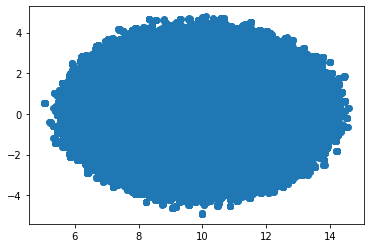

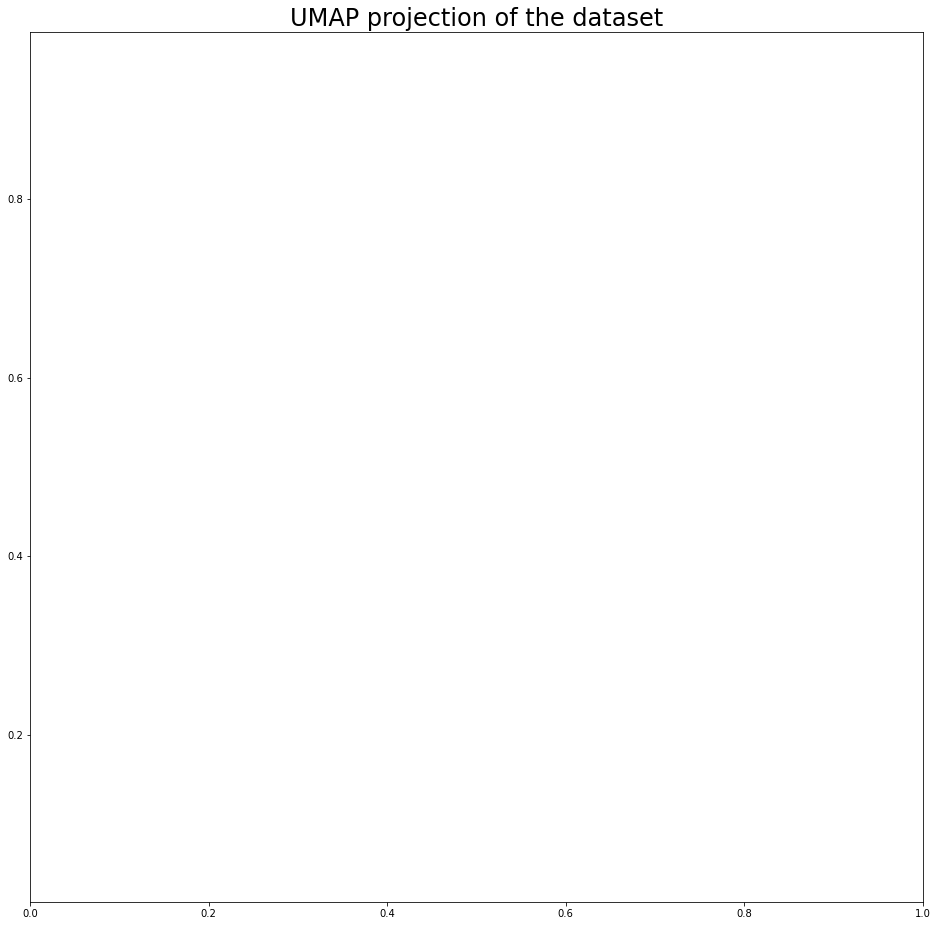

In [25]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
    )
plt.figure(figsize=(16,16))
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24)

In [33]:
from sklearn.cluster import KMeans

In [41]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

In [42]:
%%time
K = range(1, 10)




for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(compressed_layer[0])
 
    # distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        # 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    # mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
    #                                'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    mapping2["cluster_assignment"] = kmeanModel.labels_

CPU times: user 4min 19s, sys: 1min 51s, total: 6min 10s
Wall time: 1min 27s


In [47]:
mapping2['cluster_assignment']

array([1, 1, 5, ..., 5, 0, 5], dtype=int32)

In [46]:
from sklearn.cluster import KMeans

num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters, )
clustering_model.fit(text_embeddings)
cluster_assignment = clustering_model.labels_
clustered_sentences = [[] for i in range(num_clusters)]


Cluster  1
[]

Cluster  2
["Did you know we don't fully understand vaccine safety as it relates to chronic illness? This is an organization...", 'Fear above scientific fact is swaying some people. Look at the reaction that the vaccine for cervical…', 'This is important -- 75% of people infected with influenza have NO symptoms! Many of the rest have mild (cold) symp…', "It's not too late to get the flu shot! Prevention is your best protection! Thanks to the Laurel Pharmacy and...", "The death toll for this new influenza is 53 and it hasn't even hit its peak..", 'Oh lord the vaccination debate is on my Facebook by a parent I became close with over the years. She won’t vaccinat…', "Trying to avoid the flu? You're probably doing it wrong says science. Spoiler alert: Stay away from sick people, pe…", 'For all those suffering from the flu. A very good homeopathic treatment according to this article.', 'Number of influenza and salmonella cases in Townsville not significantly different to the 

In [57]:
clustered_sentences = [[] for i in range(k)]
for sentence_id, cluster_id in enumerate(mapping2['cluster_assignment'][0:100]):
  clustered_sentences[cluster_id].append(trimmed_text[sentence_id + 1466135])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['How many died under H1N1? And how many have died under COVID-19? Then STFU! You have so many death…', 'Attenzione circola un brutto virus. I sintomi più comuni sono: Le mascherine sono dannose È solo una banale influen…', 'Researchers take immunooncology cue to improve efficacy/protection by antibodies vs viral infection Engineer Fc…', 'Responden sonorenses a campaña de vacunación contra influenza: Salud Sonora', 'In Donald Trump, we have discovered what would happen if Typhoid Mary had been the boss instead of the the cook. An…', 'To all these people who compare Covid-19 to a seasonal Flu I ask, “How many of you go to hospital for 7…', 'delireum is a flu symtom !', '472 cases average per year before the vaccine wa…', "No idea what is going on but I'm going to do my best to spread awareness about $RSR &amp; $RSV at all times! 😂", 'Thank u C4 🙌. This is why they people dont trust- informedchoice…', 'Last year’s flu season was responsible for millions of cases. With COVID-19

In [43]:

for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 1.1444783812054341e+22
cluster_assignment : [1 1 5 ... 5 0 5]
2 : 4.707640556513074e+21
3 : 2.6320460485735335e+21
4 : 1.6612930378314977e+21
5 : 1.1317108873680713e+21
6 : 8.118059209808769e+20
7 : 6.156762682712171e+20
8 : 4.8095453348689347e+20
9 : 3.9205513050808805e+20


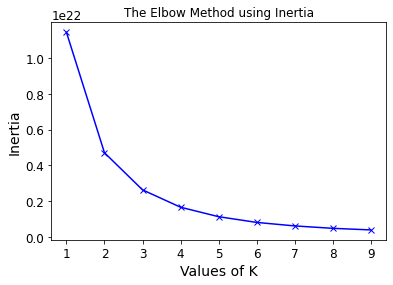

In [44]:
ks= range(1,k+1)
plt.plot(ks, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [58]:
from sklearn.manifold import TSNE
tsne = TSNE()
X_valid_2D = tsne.fit_transform(compressed_layer[0])
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


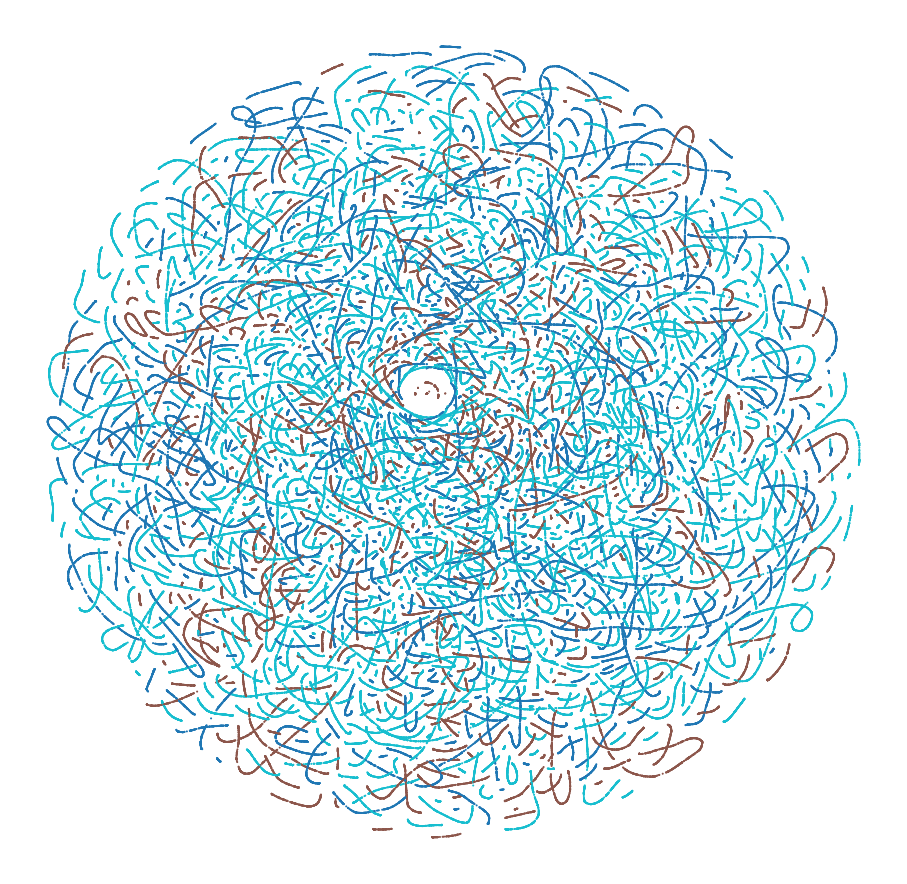

In [59]:
num_clusters = 3
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(compressed_layer[0])
cluster_assignment = clustering_model.labels_
plt.figure(figsize=(16,16))
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=cluster_assignment , s=1, cmap="tab10")
plt.axis("off")
plt.show()

In [ ]:
a

In [ ]:

pca = PCA(n_components=50)
pca_text =  pca.fit_transform(text_embeddings)

In [ ]:
# pca_text.shape

NameError: ignored

In [ ]:


# kmedoids = KMedoids(metric="cosine", n_clusters=20, random_state=0).fit(pca_text)

In [ ]:


# text_embeddings.shape

(1832669, 768)

In [ ]:


distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

In [ ]:
%%time
K = range(1, 10)




for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(text_embeddings)
 
    # distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        # 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    # mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
    #                                'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    mapping2["cluster_assignment"] = kmeanModel.labels_

tcmalloc: large alloc 5629960192 bytes == 0x5586a86c2000 @  0x7f395adb11e7 0x7f39515a846e 0x7f39515f8c7b 0x7f39515f8d97 0x7f39515f24a5 0x7f395169d9d0 0x5583270c7544 0x5583270c7240 0x55832713b627 0x558327135ced 0x558327007e2b 0x558327137fe4 0x5583271359ee 0x5583270c8bda 0x558327137737 0x5583271359ee 0x5583270c8bda 0x558327136c0d 0x5583271359ee 0x5583271356f3 0x558327133b60 0x5583270c7349 0x5583270c7240 0x55832713a973 0x5583271359ee 0x558327007eb0 0x558327137fe4 0x5583271359ee 0x5583270c8bda 0x558327136915 0x5583271359ee
tcmalloc: large alloc 5629960192 bytes == 0x5587f7fe8000 @  0x7f395adb11e7 0x7f39515a846e 0x7f39515f8c7b 0x7f39515f8d18 0x7f39516b4d79 0x7f39516b7e4c 0x7f39517d6e7f 0x7f39517dcfb5 0x7f39517dee3d 0x7f39517e0516 0x5583270c8720 0x5583270c82f9 0x7f39516bf0db 0x5583271b10b2 0x55832713762d 0x5583271359ee 0x558327007e2b 0x558327137fe4 0x5583271359ee 0x558327007e2b 0x7f39515e5ef7 0x5583270c7437 0x5583270c7240 0x55832713a973 0x5583271359ee 0x5583270c8bda 0x558327137737 0x5583270c

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


tcmalloc: large alloc 5629960192 bytes == 0x5586a86c2000 @  0x7f395adb11e7 0x7f39515a846e 0x7f39515f8c7b 0x7f39515f8d97 0x7f39515f24a5 0x7f395169d9d0 0x5583270c7544 0x5583270c7240 0x55832713b627 0x558327135ced 0x558327007e2b 0x558327137fe4 0x5583271359ee 0x5583270c8bda 0x558327137737 0x5583271359ee 0x5583270c8bda 0x558327136c0d 0x5583271359ee 0x5583271356f3 0x558327133b60 0x5583270c7349 0x5583270c7240 0x55832713a973 0x5583271359ee 0x558327007eb0 0x558327137fe4 0x5583271359ee 0x5583270c8bda 0x558327136915 0x5583271359ee
tcmalloc: large alloc 5629960192 bytes == 0x5587f7fe8000 @  0x7f395adb11e7 0x7f39515a846e 0x7f39515f8c7b 0x7f39515f8d18 0x7f39516b4d79 0x7f39516b7e4c 0x7f39517d6e7f 0x7f39517dcfb5 0x7f39517dee3d 0x7f39517e0516 0x5583270c8720 0x5583270c82f9 0x7f39516bf0db 0x5583271b10b2 0x55832713762d 0x5583271359ee 0x558327007e2b 0x558327137fe4 0x5583271359ee 0x558327007e2b 0x7f39515e5ef7 0x5583270c7437 0x5583270c7240 0x55832713a973 0x5583271359ee 0x5583270c8bda 0x558327137737 0x5583270c

CPU times: user 3h 9min 28s, sys: 2h 56min 54s, total: 6h 6min 23s
Wall time: 2h


In [ ]:

for key, val in mapping2.items():
    print(f'{key} : {val}')



1 : 300140096.0
cluster_assignment : [5 5 8 ... 7 3 1]
2 : 287973184.0
3 : 280460672.0
4 : 274988160.0
5 : 270710720.0
6 : 267463232.0
7 : 264724544.0
8 : 262246448.0
9 : 260193056.0


9

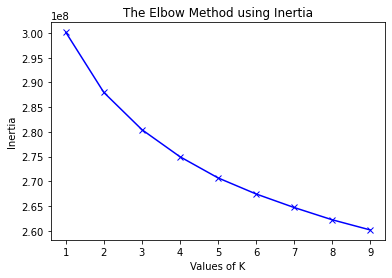

In [ ]:
ks= range(1,10)
plt.plot(ks, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:


pca_text.shape

(44154, 50)

In [ ]:

tsne = TSNE()
X_valid_2D = tsne.fit_transform(pca_text)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


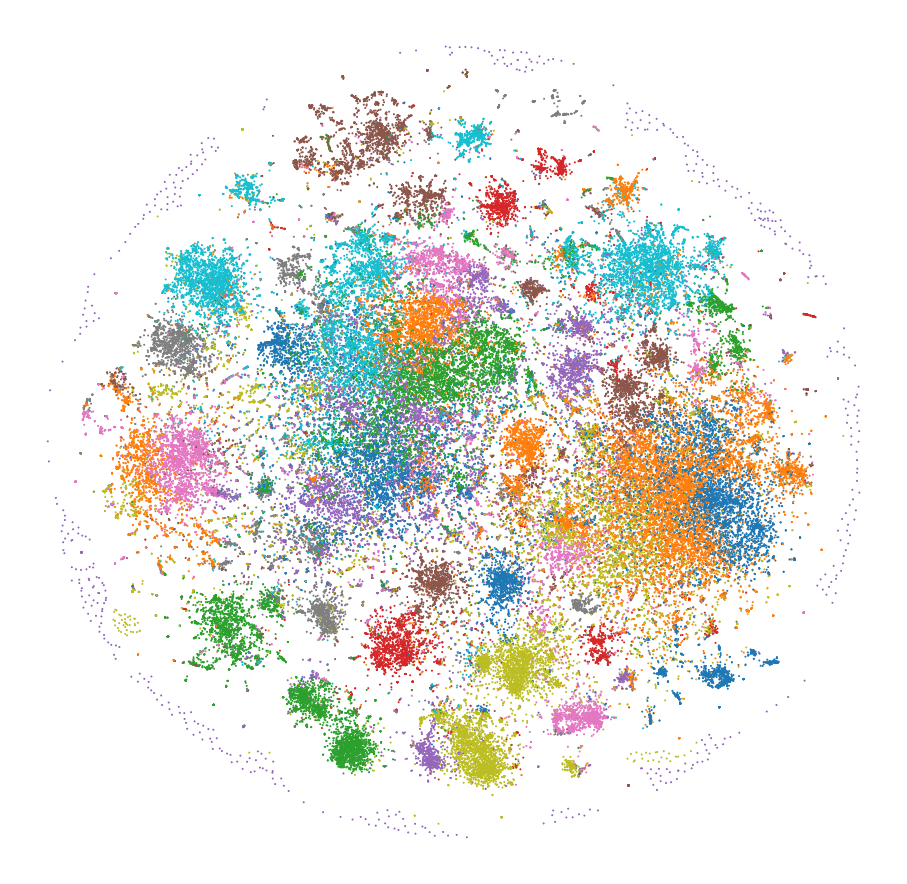

In [ ]:
plt.figure(figsize=(16,16))
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=cluster_assignment , s=1, cmap="tab10")
plt.axis("off")
plt.show()

In [43]:
!pip install -q umap-learn[plot]
!pip install -q holoviews
!pip install -U ipykernel
!pip install configs



     |████████████████████████████████| 86 kB 5.0 MB/s 
     |████████████████████████████████| 1.1 MB 29.7 MB/s 
     |████████████████████████████████| 15.8 MB 34.1 MB/s 
     |████████████████████████████████| 76 kB 6.1 MB/s 
     |████████████████████████████████| 132 kB 74.7 MB/s 
     |████████████████████████████████| 802 kB 67.5 MB/s 
     |████████████████████████████████| 793 kB 29.0 MB/s 
     |████████████████████████████████| 793 kB 66.9 MB/s 
     |████████████████████████████████| 791 kB 73.4 MB/s 
     |████████████████████████████████| 786 kB 71.2 MB/s 
     |████████████████████████████████| 779 kB 68.5 MB/s 
     |████████████████████████████████| 778 kB 69.0 MB/s 
     |████████████████████████████████| 776 kB 70.1 MB/s 
     |████████████████████████████████| 769 kB 71.6 MB/s 
     |████████████████████████████████| 766 kB 69.6 MB/s 
     |████████████████████████████████| 1.0 MB 75.6 MB/s 
     |████████████████████████████████| 722 kB 80.5 MB/s 
     |███████████

In [60]:
import umap

from configs import config as cf


clusterable_embedding = umap.UMAP(
    n_neighbors=20,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(compressed_layer[0])

ModuleNotFoundError: ignored

In [ ]:
plt.figure(figsize=(16,16))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c=cluster_assignment, s=0.1, cmap='Spectral' );

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(train_input[0])
cluster_assignment = clustering_model.labels_

In [ ]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(trimmed_text[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
def tokenize_tweet(tweet):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(tweet))

In [ ]:
tokenized_tweets = [tokenize_tweet(tweet) for tweet in trimmed_text]

In [ ]:
type(tokenized_tweets)

list

In [ ]:
tweet_with_len = [[tweet, len(tweet)]
                 for i, tweet in enumerate(tokenized_tweets)]

In [ ]:
tweet_with_len.sort(key=lambda x: x[1])

In [ ]:
import math

In [ ]:
sorted_tweets = [(tweet_text[0] ) for tweet_text in tweet_with_len]

In [ ]:
processed_dataset = tf.data.Dataset.from_generator(lambda: sorted_tweets, output_types=(tf.int32))

In [ ]:
next(iter(processed_dataset))

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([100], dtype=int32)>

In [ ]:
BATCH_SIZE = 32
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, )))

In [ ]:
# TOTAL_BATCHES = math.ceil(len(sorted_tweets) / BATCH_SIZE)
# TEST_BATCHES = TOTAL_BATCHES // 2
# X_valid = batched_dataset.take(TEST_BATCHES)
# batched_dataset.shuffle(TOTAL_BATCHES)
# train_data = batched_dataset.skip(TEST_BATCHES)

In [ ]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [24]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Input(shape=(32,)),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(154, activation="sigmoid")#,
    # keras.layers.([1, 154])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5))
history = stacked_ae.fit(train_data, epochs=20,
                         validation_data=(X_valid))

Epoch 1/20


TypeError: ignored

In [5]:
from transformers import pipeline
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
sentiment_task("Huggingface es lo mejor! Awesome library 🤗😎")

Downloading:   0%|          | 0.00/841 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

[{'label': 'Positive', 'score': 0.9343641400337219}]

In [6]:
Cluster1 = ['How many died under H1N1? And how many have died under COVID-19? Then STFU! You have so many death…',
            'Attenzione circola un brutto virus. I sintomi più comuni sono: Le mascherine sono dannose È solo una banale influen…',
            'Researchers take immunooncology cue to improve efficacy/protection by antibodies vs viral infection Engineer Fc…', 
            'Responden sonorenses a campaña de vacunación contra influenza: Salud Sonora', 
            'In Donald Trump, we have discovered what would happen if Typhoid Mary had been the boss instead of the the cook. An…', 
            'To all these people who compare Covid-19 to a seasonal Flu I ask, “How many of you go to hospital for 7…', 
            'delireum is a flu symtom !', '472 cases average per year before the vaccine wa…', 
            "No idea what is going on but I'm going to do my best to spread awareness about $RSR &amp; $RSV at all times! 😂",
            'Thank u C4 🙌. This is why they people dont trust- informedchoice…', 
            'Last year’s flu season was responsible for millions of cases. With COVID-19 still very much prevalent, this could b…', 
            'Without a vaccine what next? Is a COVID death from it or with it? Move COVID patients to nightingal…', 
            'Regeneron monoclonal antibody therapy "REGN10933 and REGN10987" effectively acts as: Treatment Cure and…', 
            'Vaccine opportunity depends on govt role, price', 'Intent to get a COVID-19 vaccine has fallen from 72% in May to 51% in September. VPDebate', 
            'China Joins WHO-Backed Covid-19 Vaccine Initiative, As The U.S. Stays Out &gt;&gt;&gt;…',
            'Fetal Cells from aborted babies are used in the flu vaccine', 
            'Long COVID is no different to what patients experience after severe influenza, pneumonia, glandular fe…']



In [7]:
sentiment_task(Cluster1)

[{'label': 'Negative', 'score': 0.921519935131073},
 {'label': 'Negative', 'score': 0.8946983218193054},
 {'label': 'Neutral', 'score': 0.6035472750663757},
 {'label': 'Neutral', 'score': 0.7936980128288269},
 {'label': 'Neutral', 'score': 0.4582768380641937},
 {'label': 'Negative', 'score': 0.6911517381668091},
 {'label': 'Negative', 'score': 0.8156061768531799},
 {'label': 'Neutral', 'score': 0.7790004014968872},
 {'label': 'Positive', 'score': 0.5137982368469238},
 {'label': 'Positive', 'score': 0.36517900228500366},
 {'label': 'Negative', 'score': 0.7275332808494568},
 {'label': 'Negative', 'score': 0.7402677536010742},
 {'label': 'Neutral', 'score': 0.7496735453605652},
 {'label': 'Neutral', 'score': 0.8451706171035767},
 {'label': 'Neutral', 'score': 0.8074036240577698},
 {'label': 'Neutral', 'score': 0.6920478343963623},
 {'label': 'Neutral', 'score': 0.8002303838729858},
 {'label': 'Negative', 'score': 0.5506162047386169}]

In [8]:
sentiment_task(Cluster2)

[{'label': 'Neutral', 'score': 0.8144306540489197},
 {'label': 'Neutral', 'score': 0.6123733520507812},
 {'label': 'Negative', 'score': 0.9446523189544678},
 {'label': 'Neutral', 'score': 0.4920330345630646},
 {'label': 'Negative', 'score': 0.7949302792549133},
 {'label': 'Negative', 'score': 0.9074919819831848},
 {'label': 'Negative', 'score': 0.4882653057575226},
 {'label': 'Positive', 'score': 0.6052323579788208},
 {'label': 'Negative', 'score': 0.8718031644821167},
 {'label': 'Negative', 'score': 0.5787925720214844},
 {'label': 'Positive', 'score': 0.6190054416656494},
 {'label': 'Positive', 'score': 0.5780251622200012},
 {'label': 'Negative', 'score': 0.8936976194381714},
 {'label': 'Negative', 'score': 0.854710578918457},
 {'label': 'Negative', 'score': 0.6580137610435486},
 {'label': 'Negative', 'score': 0.8346595168113708},
 {'label': 'Negative', 'score': 0.9086468815803528},
 {'label': 'Neutral', 'score': 0.6645505428314209}]

In [9]:
sentiment_task(Cluster3)

[{'label': 'Negative', 'score': 0.7625883221626282},
 {'label': 'Negative', 'score': 0.6238764524459839},
 {'label': 'Positive', 'score': 0.7142613530158997},
 {'label': 'Negative', 'score': 0.5917131304740906}]